<a href="https://colab.research.google.com/github/brunobonatini/Data_Science/blob/main/Projeto_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="bruno logo" width="15%" src="https://raw.githubusercontent.com/brunobonatini/Data_Science/main/logo.png">

#### **Data Scientist & Analyst**
*by [Bruno Bonatini](https://www.linkedin.com/in/bsbonatini/)*

---

#Análise dos Dados do Airbnb - *Los Angeles - Califórnia*

---


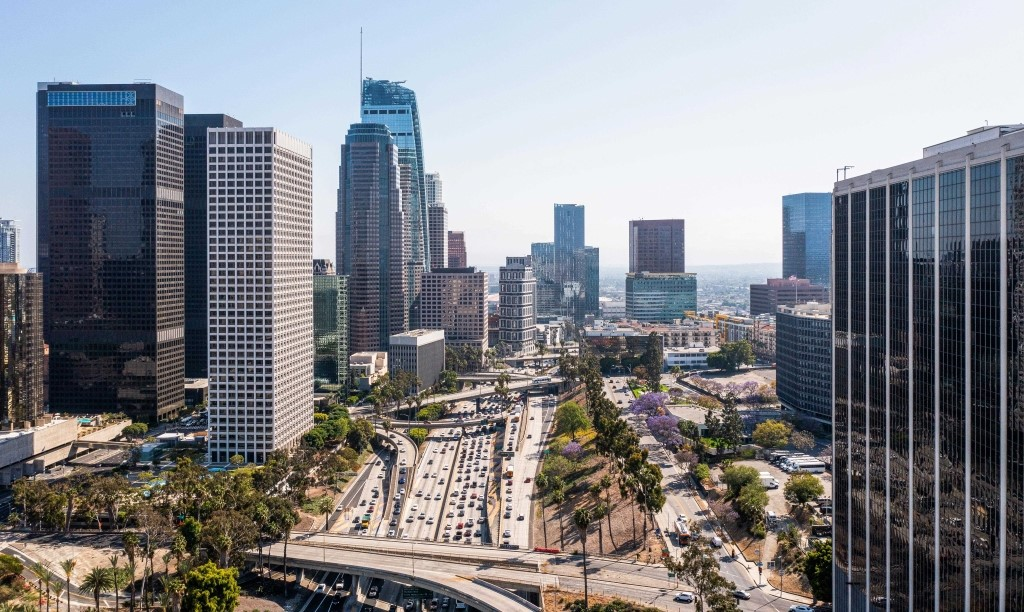

O [Airbnb]('https://www.airbnb.com.br/') é considerado a maior empresa de hotelaria da atualidade. O detalhe é que a empresa não possui nenhum hotel próprio.

Fazendo a conexão com pessoas que querem viajar (e se hospedar) com proprietários que querem alugar seu imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora e prática, tornando assim uma alternativa de hospedagem para todos.

No final de 2018, a Startup fundada há 10 anos atrás, já havia hospedado **mais de 300 milhões de pessoas** ao redor do mundo, desafiando redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb muito legal, é disponibilizar os dados do site de algumas das principais cidades do mundo. Pelo meio do [Portal Airbnb](http://insideairbnb.com/get-the-data/) é possível baixar uma grande quantidade de dados para desenvolver projetos de Data Science.

**Neste notebook analisaremos dados da cidade de Los Angeles e veremos quais insights podemos extrair dos dados brutos.**

***Los Angeles*** é a capital mundial do entretenimento, cidade que abriga o maior número de estúdios de filmes, praias belíssimas onde o surf longboard torna-se a atração principal. E quem nunca ouviu falar da "Calçada da Fama" em Hollywood e das "Patricinhas" de Beverly Hills?

***Los Angeles*** tem como idioma principal o Inglês, sua moeda é o Dólar e uma de suas comidas típicas principais é o "RAMEN BURRITO" que nada mais é do que macarrão com ovos, carnes, bacon e cebolinha se unindo em matrimônio num delicioso Wrap. 

Neste projeto trarei algumas análises para quem deseja se hospedar em Los Angeles, ou para passar as férias ou até mesmo para passar uns dias e conhecer esta cidade tão famosa.

## Obtenção dos Dados

Todos os dados que utilizei neste projeto foram obtidos a partir do site [Portal Airbnb](http://insideairbnb.com/get-the-data/).

Para esta análise exploratória inicial, será baixado o seguinte arquivo:

*   ***listing.csv - Summary information and metrics for insights in Los Angeles  (good for visualisations).***

Importante: Como o Portal com os dados está em constante evolução, pode ser que este arquivo não esteja mais disponível quando estiver visualisando este projeto.

Portanto deixo disponível [aqui](https://drive.google.com/file/d/1VxqnkLge6vHjy3BLm1W04p9iW4iwzL4H/view?usp=share_link) o link do arquivo oficial deste projeto para download.


#Importando os pacotes necessários para desenvolver o projeto

In [1]:
# importando os pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Com os pacotes importados, vamos ler o arquivo `.csv` e fazer uma breve visualização das primeiras e últimas entradas para que possamos descrever suas váriaveis e assim compreender melhor os dados.



In [2]:
# importando o arquivo listings.csv para um DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/brunobonatini/Data_Science/main/datasets/listings_losangeles.csv')

In [3]:
# visualizando as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN


In [4]:
# visualisando as últimas entradas

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
40433,774860592421665035,Cozy Hollywood Studio with Patio,458988009,Hollywood,Other Cities,West Hollywood,34.091006,-118.344620,Entire home/apt,128,3,0,NaN,NaN,24,176,0,NaN
40434,774864578948159716,Playa Vista 2BR W/ Private Wifi,187543153,Elliot,City of Los Angeles,Playa Vista,33.975508,-118.430657,Entire home/apt,180,30,0,NaN,NaN,56,30,0,NaN
40435,774866706304798119,Centrally Located LA Retreat,41968542,Mo,City of Los Angeles,Leimert Park,34.014228,-118.320888,Entire home/apt,104,30,0,NaN,NaN,3,144,0,NaN
40436,774872573559544018,2BR Bungalow in Culver City-Near LAX,462077128,Aileen,Other Cities,Culver City,33.985194,-118.393408,Entire home/apt,167,1,0,NaN,NaN,6,360,0,NaN
40437,774889783296314664,洛杉矶*熙臻行馆Venetian 独立雅房,183748799,Amy,Other Cities,Alhambra,34.070314,-118.134431,Private room,81,2,0,NaN,NaN,44,364,0,NaN


##**1. Análise dos Dados**

Esta primeira etapa do projeto tem como objetivo obter um entendimento de como os dados estão estruturados no dataset.

**Dicionário das variáveis**

* `id` - número de identificação da propriedade
* `name` - nome da propriedade
* `host_id` -  código de hospedagem
* `host_name` - nome do proprietário
* `neighbourhood_group` - grupo de bairros
* `neighbourhood` - nome do bairro
* `latitude` - posição geográfica no mapa de latitude
* `longitude` - posição geográfica no mapa de longitude
* `room_type` - tipo de quarto a ser alugado
* `price` - valor do aluguel
* `minimum_nights` - número mínimo de noites que um hospede pode reservar
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação
* `reviews_per_month` - avaliações por mês
* `calculated_host_listings_count` - número total de listagens feitas por um host
* `availability_365` - avaliação anual
* `number_of_reviews_ltm` - número de avaliações por ítem
* `license` - numero de licença da propriedade



### **1.1. Qual o total de entradas e número de colunas? Qual o tipo de dado de cada variável?**

Após detalharmos as variáveis do dataset, agora precisamos saber a quantidade total de entradas, o número de colunas (variáveis) e o tipo de dados de cada variável. 


In [5]:
# identificando o volume do DataFrame e os tipos de dados das variáveis.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40438 entries, 0 to 40437
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              40438 non-null  int64  
 1   name                            40436 non-null  object 
 2   host_id                         40438 non-null  int64  
 3   host_name                       40436 non-null  object 
 4   neighbourhood_group             40438 non-null  object 
 5   neighbourhood                   40438 non-null  object 
 6   latitude                        40438 non-null  float64
 7   longitude                       40438 non-null  float64
 8   room_type                       40438 non-null  object 
 9   price                           40438 non-null  int64  
 10  minimum_nights                  40438 non-null  int64  
 11  number_of_reviews               40438 non-null  int64  
 12  last_review                     

In [6]:
# Quantidade de entradas e colunas

print('\nTotal de entradas: {}'.format(df.shape[0]))
print('Total de colunas: {}\n'.format(df.shape[1]))


Total de entradas: 40438
Total de colunas: 18



### **1.2. Qual a quantidade de valores ausentes no dataset?**

A qualidade de um `dataset` está diretamente ligada a quantidade de seus valores ausentes. Mas o que são estes valores ausentes ou nulos?

Valores ausentes ou nulos `(NaN, Null)`, são campos no `dataset` que não foram preenchidos, ou por esquecimento caso tenha sido manipulado por um humano, ou por não constar nenhuma informação de fato.

É muito importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Logo abaixo, veremos qual a quantidade e portcentagem de valores ausentes em cada variável em relação a quantidade total do `dataset`.

In [7]:
# verificando a quantidade de valores ausentes em cada variável

df.isnull().sum().sort_values(ascending=False)

license                           30176
reviews_per_month                 10585
last_review                       10585
host_name                             2
name                                  2
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [8]:
# valores ausentes em porcentagem sobre o valor total de entradas, ordenado em ordem decrescente

((df.isnull().sum() / df.shape[0]).sort_values(ascending = False)) * 100


license                           74.622879
reviews_per_month                 26.175874
last_review                       26.175874
host_name                          0.004946
name                               0.004946
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

###Podemos identificar as seguintes situações nos valores ausentes.
* Aproximadamente 75% dos dados da variável `license` são nulos.
* 26% dos dados das variáveis `last_review` e `reviews_per_month` são nulos.
* Os dados nulos das variáveis `name` e `host_name` são iguais.

###Tratando valores ausentes

Nesta etapa do projeto faremos a limpeza ou preenchimento dos campos que estão com valores ausentes.

Notem que aproximadamente 75% dos valores da coluna `license` e 26% dos dados da coluna `last_review` são nulos, porém não utilizarei estas colunas para este projeto em si. 

Por isso removerei estas duas colunas (variáveis) do nosso `dataset` para uma melhor performance na análise.

Para isso vou criar uma váriavel `df_clean` e copiar o `dataset` dentro dela, após copiar o `dataset`, estarei limpando os valores ausentes na variável `df_clean`.

In [9]:
df_clean = df.copy()

In [10]:
# removendo as colunas que não utilizarei nesta análise

df_clean.drop('license', axis=1, inplace=True)
df_clean.drop('last_review', axis=1, inplace=True)
df_clean.drop('id', axis=1, inplace=True)
df_clean.drop('host_id', axis=1, inplace=True)

Após a remoção das variáveis não utilizadas no projeto, vamos verificar os dados ausentes restantes e fazer uma análise deles para assim trata-los da melhor maneira em que nosso `dataset` não seja prejuducado com a perda de muitos dados.

In [11]:
# mostrando os valores ausentes após a remoção das colunas acima.

df_clean.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10585
name                                  2
host_name                             2
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

Agora vamos analisar a variável `reviews_per_month`, pois como podemos ver acima ela possui 10585 valores ausentes.

Vou utilizar o `describe` para visualizar os valores estatísticos da variável e ter uma noção de como estes valores estão distribuidos, analisando a média e a mediana para preenchimento dos valores ausentes.

In [12]:
# mostrando os valores estatísticos da variável reviews_per_month

df_clean['reviews_per_month'].describe()

count    29853.000000
mean         1.499085
std          1.866809
min          0.010000
25%          0.240000
50%          0.800000
75%          2.250000
max         89.000000
Name: reviews_per_month, dtype: float64

Como podemos ver, apesar de termos um valor máximo de 89, os valores da variável estão bem destribuidos. 

A `*média (1.4)*` e a `*mediana (0.8)*` da variável `reviews_per_month` não estão muito distantes, portanto utilizarei a `*média*` para preencher os valores ausente e mantê-la em 1.5 avaliações por mês aproximadamente.

Vou criar uma variável `*rpm_mean*` e nela atribuir o DataFrame `df` com a `*média*` da coluna `reviews_per_month`, depois na variável *`df`* do DataFrame, com o comando *`.fillna()`* vou preencher os valores ausentes com a `*média*` utilizando um dicionário cujo a chave é a coluna `reviews_per_month` e o valor é a variável `rpm_mean`.



In [13]:
# preenchendo os valores ausentes em `reviews_per_month` com a mediana

rpm_mean = df_clean['reviews_per_month'].mean()
df_clean = df_clean.fillna({'reviews_per_month' : rpm_mean})

In [14]:
# verificando os valores ausentes faltantes

df_clean.isnull().sum().sort_values(ascending=False)

name                              2
host_name                         2
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Agora vamos analisar os valores ausentes nas variáveis `name` e `host_name` usando `.loc`.

In [15]:
df_clean.loc[df_clean.name.isnull()]


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5875,NaN,Deonte,Other Cities,Walnut,34.04539,-117.85014,Shared room,35,1,0,1.499085,1,0,0
6494,NaN,Karina,Unincorporated Areas,Altadena,34.17161,-118.11570,Private room,125,2,0,1.499085,1,0,0


In [16]:
df_clean.loc[df_clean.host_name.isnull()]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2766,"Quiet, Cozy West LA House",NaN,City of Los Angeles,Mar Vista,34.00105,-118.43665,Entire home/apt,99,30,0,1.499085,1,0,0
3831,Large private bedroom in Palms,NaN,City of Los Angeles,Rancho Park,34.03157,-118.41318,Private room,41,30,2,0.020000,1,0,0


Temos apenas 4 linhas com valores `nulos (NaN)` somando os campos de `name` e `host_name`.

Neste caso, fazendo uma pesquisa pelo nome da propriedade consegui encontrar os nomes dos proprietários que estão ausentes em `host_name`, porém não consegui encontrar o nome das propriedades pelos nomes dos proprietários em `name`.

Portanto, subistituirei os valores ausentes em `host_name` `Nan` pelo nome dos proprietários, e em seguida vou excluir as linhas com valores ausentes em `name`.

In [17]:
# substituindo os valores ausentes em 'host_name' pelos nomes dos proprietários

df_clean.loc[2766, 'host_name'] = 'Patrick'
df_clean.loc[3831, 'host_name'] = 'Vesela'

In [18]:
# excluindo as linhas com valores ausentes na variável 'name'

df_clean.dropna(subset=['name'], axis=0, inplace=True)

Após o tratamento dos valores ausentes, comparamos o DataFrame limpo com o DataFrame original não limpo.

In [19]:
df_clean.isnull().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [20]:
print('DataFrame limpo: ', df_clean.shape)
print('DataFrame original: ', df.shape)

DataFrame limpo:  (40436, 14)
DataFrame original:  (40438, 18)


##**2. Como os dados estão distribuídos nas variáveis?**

Após limpar os valores ausentes das variáveis, vamos identificar a distribuição dos dados plotando um histograma.

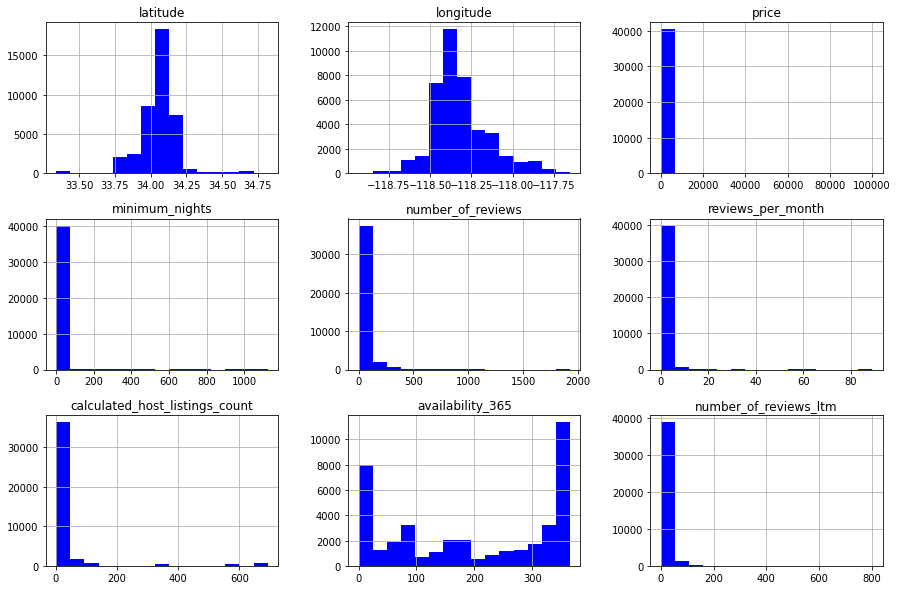

In [21]:
df_clean.hist(bins=15, figsize=(15, 10), color='blue');


##**3. Analisando Outliers**

Observando as variáveis `price`, `minimum_nights`, `number_of_reviews`, `calculated_host_listings_count` e `number_of_reviews_ltm` no histograma pode se notar que não seguem uma distribuição e distorcem a representação gráfica, isso quer dizer que temos presença de `outliers`.

Para confirmar se existem estes outiliers veremos um resumo estatístico das variáveis e plotaremos os `boxplots` para cada variável.

In [22]:
# verificando o resumo estatístico das variáveis numéricas

df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,40436.000000,40436.000000,40436.000000,40436.000000,40436.000000,40436.000000,40436.000000
mean,279.459467,18.701504,33.563681,1.499085,32.551687,198.174770,8.930557
std,1136.490343,30.974168,72.692578,1.604013,114.680798,142.643619,18.804820
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,85.000000,2.000000,0.000000,0.360000,1.000000,62.000000,0.000000
50%,138.000000,30.000000,5.000000,1.499085,2.000000,190.000000,1.000000
75%,235.000000,30.000000,31.000000,1.590000,10.000000,348.000000,8.000000
max,99999.000000,1124.000000,1924.000000,89.000000,693.000000,365.000000,801.000000


Observando o resumo estatístico podemos dizer que:

* O preço da propriedade (price) tem 75% dos valores menores que 235.00 e o seu valor máximo é de 99999.00 por noite.
* A quantidade mínima de noites a serem reservadas (minimum_nigths) está acima de 365 dias no ano.
* Avaliações por mês tem seu valor máximo de 89 sendo que o mês tem 30 ou 31 dias.
* O número de avaliações (number_of_reiews) tem 75% dos valores abaixo de 31 e seu valor máximo é de 1924.
* O número total de listagens feitas por um host (calculated_host_listings_count) 75% é menor do que 10 e seu valor máximo é 693.
* O número de avaliações por item tem 75% dos valores abaixo de 8 e seu valor máximo está em 801. 

###Boxplot para `price` - Identificando outliers

Vamos verificar a quantidade de imóveis cuja o preço é acima de 1500.

price - valores acima de 1500:
839 entradas.
2.0749%.


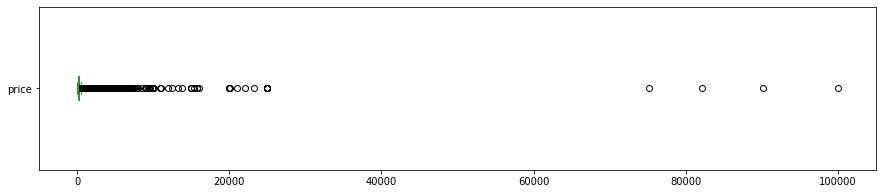

In [23]:
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))

print('price - valores acima de 1500:')
print('{} entradas.'.format(len(df_clean[df_clean.price > 1500])))
print('{:.4f}%.'.format((len(df_clean[df_clean.price > 1500]) / df_clean.shape[0])*100))

###Boxplot para `minimum_nigths` - Identificando outliers

Aqui, analisareamos a quantidade mínima de noites que um hospede pode reservar.

Vou tomar como base um imóveis com mínimo de 3 meses.

minimum_nights - valores acima de 90:
278 entradas.
0.6875%.


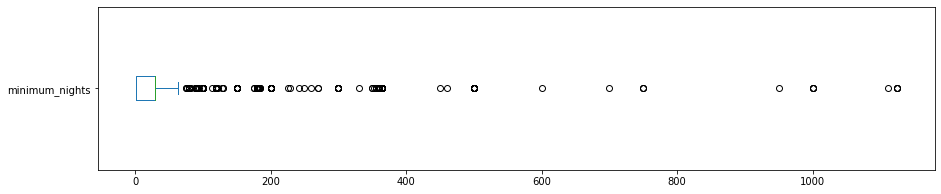

In [24]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))

print('minimum_nights - valores acima de 90:')
print('{} entradas.'.format(len(df_clean[df_clean.minimum_nights > 90])))
print('{:.4f}%.'.format((len(df_clean[df_clean.minimum_nights > 90]) / df_clean.shape[0])*100))

###Boxplot para `reviews_per_month` - Identificando outliers

Verificando o número de avaliações por mês cima de 30, pois se o imóvel é alugado todos os dias para 1 pessoa por dia no mínimo, teríamos 30 avaliações no mês, caso todas as pessoas avaliassem o imóvel.

reviews_per_month - acima de 30:
4 entradas.
0.0099%


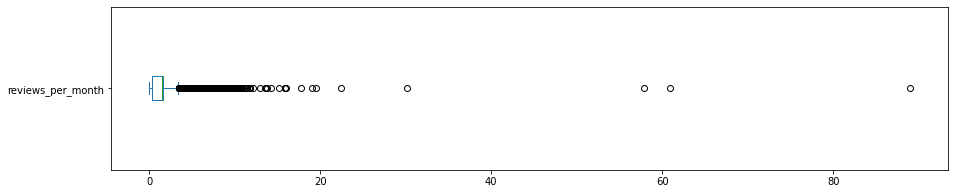

In [25]:
df_clean.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))

print('reviews_per_month - acima de 30:')
print('{} entradas.'.format(len(df_clean[df_clean.reviews_per_month > 30])))
print('{:.4f}%'.format((len(df_clean[df_clean.reviews_per_month > 30]) / df_clean.shape[0])*100))

###Boxplot para `number_of_reviews` - Identificando outliers

Verificando o número de avaliações tomando como base valores acima de 365.

number_of_reviews - acima de 365:
372 entradas.
0.9200%.


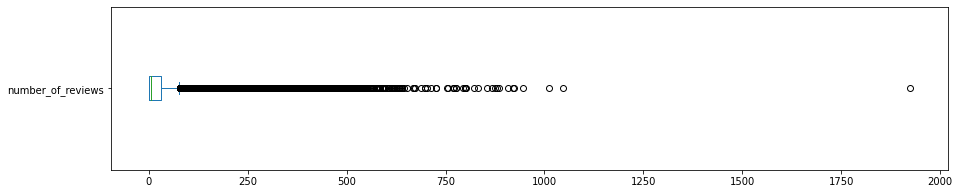

In [26]:
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))

print('number_of_reviews - acima de 365:')
print('{} entradas.'.format(len(df_clean[df_clean.number_of_reviews > 365])))
print('{:.4f}%.'.format((len(df_clean[df_clean.number_of_reviews > 365]) / df_clean.shape[0])*100))

###Boxplot para `calculated_host_listings_count` - Identificando outliers

Verificando quantidade de listagens por anfitrião acima de 200.

calculated_host_listings_count - acima de 200:
1603 entradas.
3.9643%


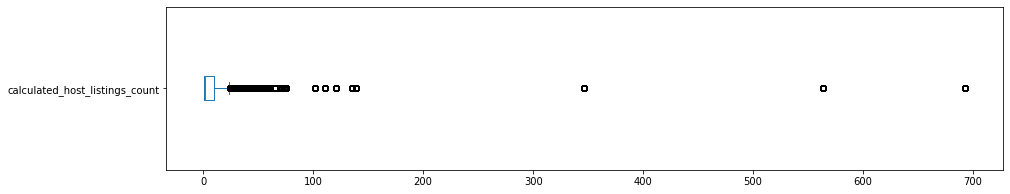

In [27]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))

print('calculated_host_listings_count - acima de 200:')
print('{} entradas.'.format(len(df_clean[df_clean.calculated_host_listings_count > 200])))
print('{:.4f}%'.format((len(df_clean[df_clean.calculated_host_listings_count > 200]) / df_clean.shape[0])*100))

###Boxplot para `number_of_reviews` - Identificando outliers

Verificando a quantidade de valores acima de 100.

number_of_reviews_ltm - acima de 100:
133 entradas.
0.3289%


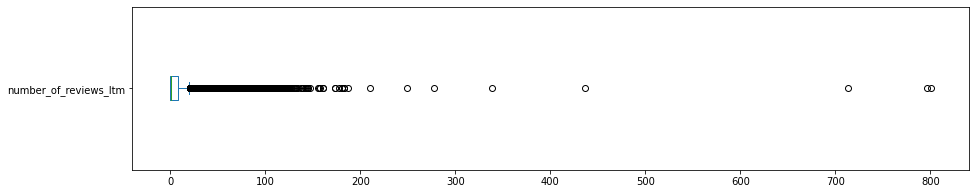

In [28]:
df_clean.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3))

print('number_of_reviews_ltm - acima de 100:')
print('{} entradas.'.format(len(df_clean[df_clean.number_of_reviews_ltm > 100])))
print('{:.4f}%'.format((len(df_clean[df_clean.number_of_reviews_ltm > 100]) / df_clean.shape[0])*100))

###Histograma sem outliers

Conforme analisamos os `outliers` nas variáveis `price`, `minimum_nights`, `reviews_per_month`, `number_of_reviews`, `calculated_host_listings_count` e `number_of_reviews_ltm`, agora vamos limpar o DataFrame delas e plotar um histograma novamente.

* Os valores de `price` acima de 1500 serão apagados;
* Os valores de `minimun_nights` acima de 90 serão apagados;
* Os valores de `reviews_per_month` acima de 30 serão apagados;
* Os valores de `number_of_reviews` acima de 500 serão apagados;
* Os valores de `calculated_host_listings_count` acima de 200 serão apagados;
* Os valores de `number_of_reviews_ltm` acima de 100 serão apagados.

In [29]:
# removendo os outliers em df_clean

df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 100].index, axis=0, inplace=True)

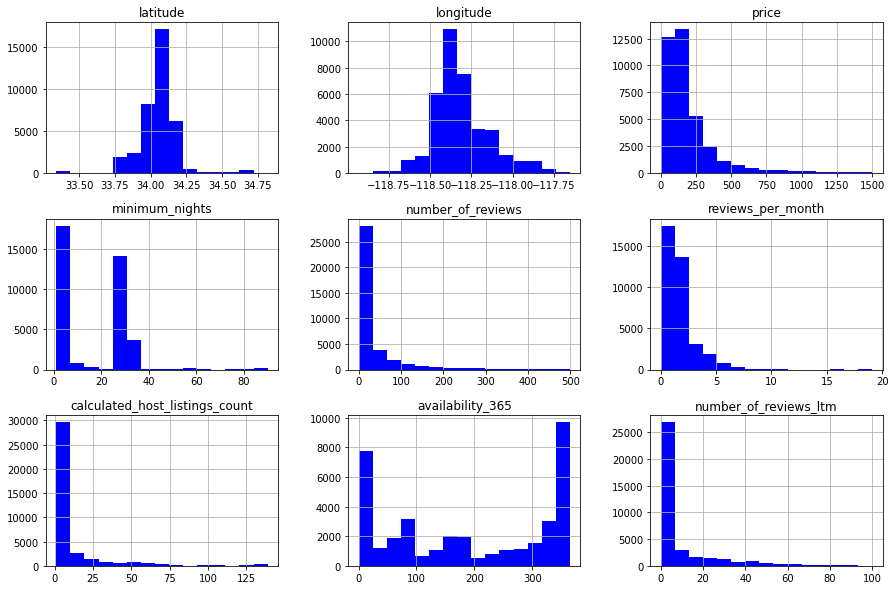

In [30]:
# plotando o histograma para as variáveis numéricas

df_clean.hist(bins=15, figsize=(15, 10), color='blue');

Observe como ficou melhor a distribuição dos dados no histograma com o DataFrame limpo.

##**04. Insights - Los Angeles**

###4.1. Qual a média dos preços de aluguel em Los Angeles?

Para quem um dia deseja conhecer Los Angeles, veremos qual o valor médio cobrado por noite para se hospedar na cidade.

Plotarei um gráfico da variável price para visualizar o resultado.

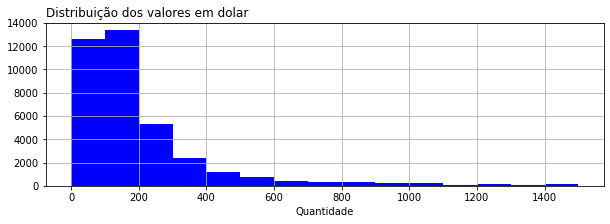


Média: 201.29


In [31]:
# plotando um histograma com a média de preço 

df_clean.price.hist(bins=15, figsize=(10, 3), color='blue')
plt.title('Distribuição dos valores em dolar', loc='left')
plt.xlabel('Valor')
plt.xlabel('Quantidade')
plt.show();

# mostrando a média da coluna `price`` 

print('\nMédia: {:.2f}'.format(df_clean['price'].mean()))

O valor médio do aluguel em Los Angeles como podemos ver no gráfico fica em torno de $ 200.00 por noite.

In [32]:
# comparando a média de valores do aluguel antes e após a limpeza dos dados

print('Média de preços antes da limpeza de dados: $ {:.2f}'.format(df.price.mean()))
print('Média de preços depois da limpeza de dados: $ {:.2f}'.format(df_clean.price.mean()))

Média de preços antes da limpeza de dados: $ 279.45
Média de preços depois da limpeza de dados: $ 201.29


###4.2. Qual a correlação existente entre as variáveis do dataset?

Correlação significa que existe relação entre duas 'coisas'. Em nosso caso estamos buscando relações entre as variáveis.

Esta relação pode ser medida, e é a função do coeficiente de correlação estabelecer qual a intensidade dela. Quanto mais o coeficiente de correlação se aproximar de 1.0, maior é a correlação entre elas.

Para identificar as correlações existentes entre as variáveis de interesse vamos:
* Criar uma matriz de correlação;
* Gerar um heatmap a partir desta matriz, utilizando a biblioteca `seaborn`.

In [33]:
# criando a uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrando a matriz de correlação

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.101182,-0.060870,-0.004981,-0.004763,0.084048
minimum_nights,-0.101182,1.000000,-0.170678,-0.390404,0.059384,-0.032141
number_of_reviews,-0.060870,-0.170678,1.000000,0.505681,-0.127800,-0.019536
reviews_per_month,-0.004981,-0.390404,0.505681,1.000000,-0.097945,0.071989
calculated_host_listings_count,-0.004763,0.059384,-0.127800,-0.097945,1.000000,0.163198
availability_365,0.084048,-0.032141,-0.019536,0.071989,0.163198,1.000000


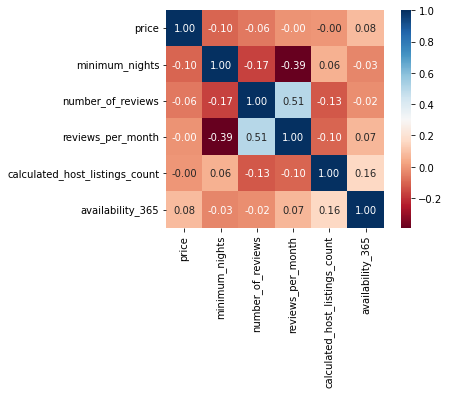

In [34]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

###4.3. Qual o tipo de imóvel mais alugado em Los Angeles?

A coluna `room_type` indica o tipo de locação que está disponibilizado no Airbnb.

Para que utiliza frequentemente o site, sabe que temos opções de apartamentos ou casas inteiras, aluguel de um quarto ou até mesmo dividir um quarto com outros hóspedes.

Primeiramente vamos analisar os tipos de imóveis a serem alugados com seus valores únicos, depois contar e verificar a quantitade de ocorrências de cada tipo de aluguel.

In [35]:
# analisando os tipos de imóveis com valores únicos

df_clean.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [36]:
# mostrando a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    26537
Private room       10114
Shared room          773
Hotel room            77
Name: room_type, dtype: int64

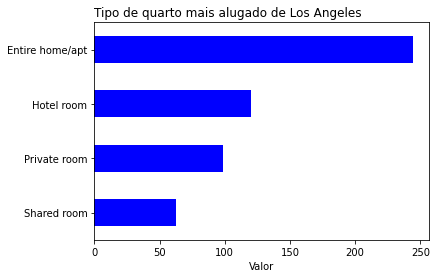



Entire home/apt    70.763446
Private room       26.969947
Shared room         2.061278
Hotel room          0.205328
Name: room_type, dtype: float64


In [37]:
# plotando um gráfico com os tipos de quartos mais alugados em Los Angeles

df_clean.groupby('room_type')['price'].mean().sort_values(ascending=True)[-10:].plot(kind='barh', color='blue')

plt.title('Tipo de quarto mais alugado de Los Angeles', loc='left')
plt.xlabel('Valor')
plt.ylabel('')
plt.show();

# mostrando a porcentagem de cada tipo de imóvel disponível em relação ao total de imóveis

print('\n')
print((df_clean.room_type.value_counts() / df_clean.shape[0]) *100)


Analisando os dados acima, temos 4 tipos de aluguéis no Airbnb para Los Angeles com suas respectivas disponibilidades:

* Casa ou Apartamento - 26.601 unidades - 70% dos aluguéis
* Quarto privado - 10.144 unidades - Aproximadamente 27% dos aluguéis
* Quarto compartilhado - 774 - 2% dos aluguéis
* Quarto de hotel - 77 - Menos de 1% dos aluguèis

Podemos concluir que o imóvel mais alugado é do tipo **`home/apt (casa/apto)`**.

###4.4. Qual a localidade mais cara de Los Angeles?



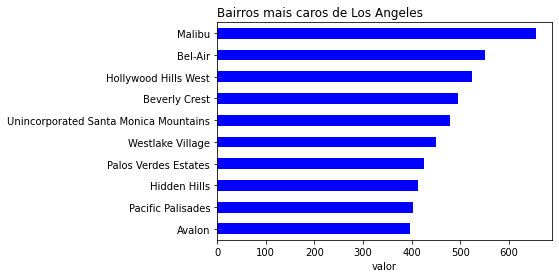



neighbourhood
Malibu                                   656.231834
Bel-Air                                  550.925000
Hollywood Hills West                     524.786385
Beverly Crest                            495.824561
Unincorporated Santa Monica Mountains    479.046358
Westlake Village                         449.888889
Palos Verdes Estates                     426.368421
Hidden Hills                             414.000000
Pacific Palisades                        403.918367
Avalon                                   397.453125
Name: price, dtype: float64


In [38]:
# plotando um gráfico com os bairros mais caros de Los Angeles

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[-10:].plot(kind='barh', color='blue')

plt.title('Bairros mais caros de Los Angeles', loc='left')
plt.xlabel('valor')
plt.ylabel('')
plt.show();

# verificando a média de preços por bairros em Los Angeles

print('\n')
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

In [39]:
# verificando a quantidade de imóveis no bairro Bel-Air e Hidden Hills

print(df_clean[df_clean.neighbourhood == 'Bel-Air'].shape)
print(df_clean[df_clean.neighbourhood == 'Hidden Hills'].shape)

(40, 14)
(6, 14)


Conseguimos perceber que bairros como `Malibu` e `Bel-Air` estão com valores médios acima de bairros como `Beverly Hills`, `Hollywood` que são os mais populares e mais caros de Los Angeles.

Normalmente `Beverly Hills` e `Hollywood` estariam no topo como bairros mais caros, porém como são muito procurados e alugados, faz com que sua média de valor caia em relação a bairros com menor número de aluguel com valores altos.

Veja quantas entradas há para `Bel-Air`, apenas 40 propriedades, `Hidden Hills`, apenas 6 propriedades, porém com valores muito altos, fazendo com que o bairro suba no ranking.




###4.5. Quais os bairros mais alugados em Los Angeles?

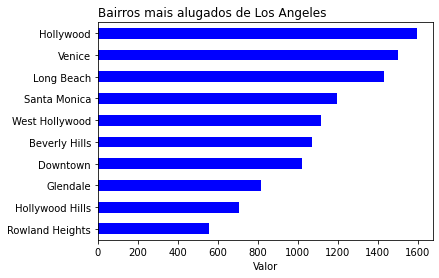



Hollywood          1596
Venice             1503
Long Beach         1433
Santa Monica       1199
West Hollywood     1118
Beverly Hills      1073
Downtown           1023
Glendale            817
Hollywood Hills     706
Rowland Heights     556
Name: neighbourhood, dtype: int64


In [40]:
# plotando um gráfico com os bairros mais alugados

df_clean.neighbourhood.value_counts().head(10).sort_values(ascending=True)[-10:].plot(kind='barh', color='blue')

plt.title('Bairros mais alugados de Los Angeles', loc='left')
plt.xlabel('Valor')
plt.ylabel('')
plt.show();

# verificando quais bairros possuem maior numero de aluguéis

print('\n')
print(df_clean.neighbourhood.value_counts().head(10))

Quando falamos em bairros com maior número de aluguéis, nota-se que os bairros mais conhecidos e que possuem um maior número de pontos turísticos, são os que aparecem no top 10 da lista de mais alugados, sendo mais previsível o resultado.

Vamos ver a frequência com que estes bairros são alugados.

In [41]:
# verificando em porcentagem a frequência de aluguéis do maior para o menor

df_clean.neighbourhood.value_counts().head(10) / df_clean.shape[0]

Hollywood          0.042559
Venice             0.040079
Long Beach         0.038212
Santa Monica       0.031972
West Hollywood     0.029813
Beverly Hills      0.028613
Downtown           0.027279
Glendale           0.021786
Hollywood Hills    0.018826
Rowland Heights    0.014826
Name: neighbourhood, dtype: float64

###4.6. Quais os bairros mais baratos de Los Angeles?


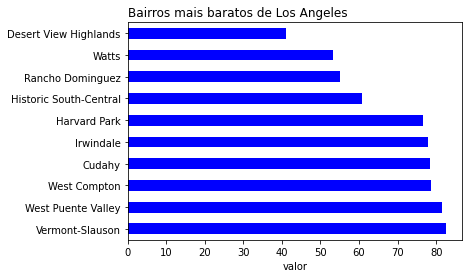



neighbourhood
Desert View Highlands     41.000000
Watts                     53.222222
Rancho Dominguez          55.000000
Historic South-Central    60.853659
Harvard Park              76.700000
Irwindale                 78.000000
Cudahy                    78.500000
West Compton              78.571429
West Puente Valley        81.583333
Vermont-Slauson           82.655172
Name: price, dtype: float64


In [42]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-10:].plot(kind='barh', color='blue')

plt.title('Bairros mais baratos de Los Angeles', loc='left')
plt.xlabel('valor')
plt.ylabel('')
plt.show();

print('\n')
print(df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)[:10])

In [43]:
# analisando quantas propriedades constam em 2 dos bairros mais baratos em Los Angeles

print(df_clean[df_clean.neighbourhood == 'Desert View Highlands'].shape)
print(df_clean[df_clean.neighbourhood == 'Rancho Dominguez'].shape)

(3, 14)
(4, 14)


Analisando as cidades `Desert View Highlands` e `Rancho Dominguez`, a primeira está em uma região distante dos grandes centros de Los Angeles, e com poucas propriedades disponívels, pode ser por isso o seu baixo valor. A segunda está até bem localizada no sul de Los Angeles, porém com poucas propriedades para aluguel também.

Por estes motivos estes bairros tornam-se menos procurados no Airbnb.

Vimos que o bairro mais procurado em Los Angeles é Hollywood, por isso vamos fazer uma análise sobre o bairro no bairro que mais tem hospedagem e justifique o porque é tão procurado.

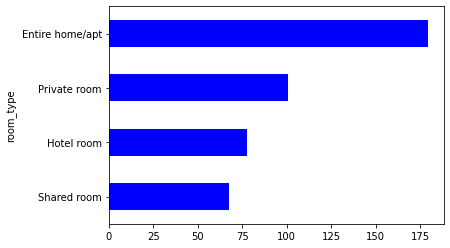

In [44]:
# plotando um gráfico com as opções de quartos mais alugados em Hollywood

df_clean[df_clean['neighbourhood'] == 'Hollywood'].groupby(['room_type']).price.mean().sort_values(ascending=True).plot(kind='barh', color='blue');

In [45]:
# analisando as informações estatísticas de Hollywood

print(df_clean[df_clean['neighbourhood'] == 'Hollywood']['price'].describe())

count    1596.000000
mean      162.451754
std       154.934435
min         0.000000
25%        79.000000
50%       118.000000
75%       186.250000
max      1450.000000
Name: price, dtype: float64


Hollywood é o bairro mais procurado de Los Angeles, por ser um bairro famoso devido ao cinema, onde se concentra os maiores atores e estúdios, e também a tão conhecida "Calçada da Fama'.

Mas como podemos ver nos valores estatísticos, Hollywood não se torna tão procurada somente pela sua fama, e sim pelo custo de hospedagem. 75% de seus valores são menores que $ 186.00 por noite, entregando uma localidade muito boa no centro de Los Angeles.

Hollywood também é o segundo bairro mais avaliado no ano, atrás somente de Beverly Hills segundo os dados abaixo.

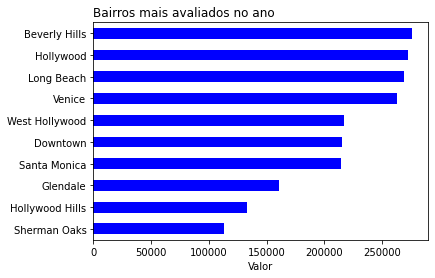



neighbourhood
Beverly Hills      276013
Hollywood          272324
Long Beach         268970
Venice             262556
West Hollywood     216845
Downtown           215074
Santa Monica       214331
Glendale           160250
Hollywood Hills    133230
Sherman Oaks       113383
Name: availability_365, dtype: int64


In [76]:
# visualizando quais os bairros mais avaliados no ano

df_clean.groupby('neighbourhood')['availability_365'].sum().sort_values(ascending=True)[-10:].plot(kind='barh', color='blue')

plt.title('Bairros mais avaliados no ano', loc='left')
plt.xlabel('Valor')
plt.ylabel('')
plt.show();

# mostrando os valores dos bairros mais avaliados no ano

print('\n')
print(df_clean.groupby('neighbourhood')['availability_365'].sum().sort_values(ascending=False)[:10])

###4.7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?

In [46]:
# mostrando a média da coluna `minimum_nights``

df_clean['minimum_nights'].mean()

16.44508146449428

O valor médio do mínimo de noites em Los Angeles de acordo com os dados é de 16 dias aproximadamente.

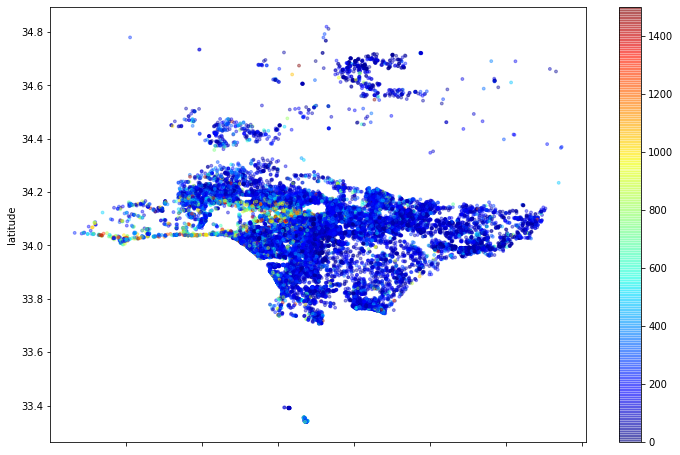

In [47]:
# plotando os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12, 8));



Ao olharmos o gráfico podemos concluir que os bairros mais locados da cidade de Los Angeles fica em torno da região central e próximo as belas praias.

#**5. Conclusões**


Foi feita apenas uma análise superfical na base de dados do Airbnb, porém pude tirar informações valiosas da cidade de Los Angeles para quem desejar um dia conhecer.

Falando da parte técnica, fizemos a importação dos dados, exploração do dataset, análise e limpeza dos dados. 

Na análise exploratória, verificamos os resumos estatísticos das variáveis, tipo de hospedagem mais locada, qual a localidade mais cara na cidade de Los Angeles, qual o bairro mais alugado, qual o bairro mais caro e mais barato de Los Angeles, qual o motivo do bairro mais alugado ser o mais procurado, quais os bairros mais avaliados no ano, a média do mínimo de noites e a visualização por longitude e latitude onde se concentra o maior número de hospedagens.

Para conseguir maiores insights o ideal é pegar o dataset completo no site do Airbnb, aumentando assim a qualidade das informações por conter maior quantidade de dados.

Com esta análise pude conhecer melhor a cidade de Los Angeles, e com certeza este projeto será primordial para eu me programar para uma futura viagem.